<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [2]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas de Cauchy |    7      7  0.0s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [3]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : true



-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = 

[1.0000065049853921, 1.000000873235793, 0.9999952414861938]
  * f(x_sol) = 7.71589405988668e-11
  * nb_iters = 33
  * flag     = 2
  * solution = [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.0000036431990917, 0.9999997146801122, 0.999995786161284]
  * f(x_sol) = 3.233185492873304e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9993529197791873, 0.9987042941091689]
  * f(x_sol) = 4.1909860541026343e-7
  * nb_iters = 5000
  * flag     = 3
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f2:
  * x0       = [10, 0]
  * x_sol    = [0.9961677295959247, 0.9923393628794702]
  * f(x_sol) = 1.4697922915267688e-5
  * nb_iters = 864
  * flag     = 0
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f2:
  * x0       = [0.0, 0.0050000000010000005]
  * x_sol    = [0.9998396448612803, 0.9996777928289808]
  * f(x_sol) = 2.5945603828137927e-8
  * nb_iters = 4512
  * flag     = 2
  * solution = [1, 1]
Test Summary:        | Pass  Total  

Time
RC et pas de Cauchy  |   15     15  0.9s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

In [4]:
# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

using LinearAlgebra
using Markdown

# Inclusion des fichiers des différents algorithmes
include("../src/newton.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/cauchy.jl")
include("../test/fonctions_de_tests.jl")




# Définition de la fonction f1, son gradient et sa hessienne
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
grad_f1(x) = [4 * (x[1] + x[2] + x[3] - 3) + 2 * (x[1] - x[2]); 4 * (x[1] + x[2] + x[3] - 3) - 2 * (x[1] - x[2]) + 2 * (x[2] - x[3]); 4 * (x[1] + x[2] + x[3] - 3) - 2 * (x[2] - x[3])]
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1, 1, 1]

# Newton
max_iter = 100
Tol_abs = sqrt(eps())
Tol_rel = 1e-15
epsilon = 1.e-2

# Region de confiance

deltaMax = 10
gamma1 = 0.5
gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
delta0 = 2
max_iter = 1000
tol_abs = sqrt(eps())
tol_rel = 1e-15
epsilon = 1.e-2

# Test 
x0 = [2, -1, 0]

# Exécution et affichage des résultats pour l'algorithme de Newton
xsol, f_sol, flag, nb_iters, xs = newton(f1, grad_f1, hess_f1, x0; max_iter, tol_abs, tol_rel, epsilon)
afficher_resultats("Newton", "f1", x0, xsol, f_sol, flag, nb_iters, sol_exacte)

# Exécution et affichage des résultats pour l'algorithme des Régions de confiance avec le pas de cauchy
xsol, f_sol, flag, nb_iters, xs = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    x0, 
    max_iter = max_iter, 
    tol_abs = Tol_abs, 
    tol_rel = Tol_rel, 
    epsilon = epsilon, 
    Δ0 = delta0, 
    Δmax = deltaMax, 
    γ1 = gamma1, 
    γ2 = gamma2,
    η1 = eta1, 
    η2 = eta2, 
    algo_pas = "cauchy", 
    max_iter_gct = 2
)
afficher_resultats("Cauchy", "f1", x0, xsol, f_sol, flag, nb_iters, sol_exacte)


-------------------------------------------------------------------------
Résultats de : Newton appliqué à f1:
  * x0       = [2, -1, 0]
  * x_sol    = [0.9999999999999998, 1.0000000000000004, 1.0]
  * f(x_sol) = 6.409494854920721e-31
  * nb_iters = 1
  * flag     = 0
  * solution = [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : Cauchy appliqué à f1:
  * x0       = [2, -1, 0]
  * x_sol    = [1.000066492786018, 1.0000069820635509, 0.9999474713410841]
  * f(x_sol) = 7.960537982815421e-9
  * nb_iters = 29
  * flag     = 2
  * solution = [1, 1, 1]


variation des itérations pour des valeurs de delta croissante: Any[31, 31, 30, 31, 30, 27, 28, 29, 30, 30, 25, 25]


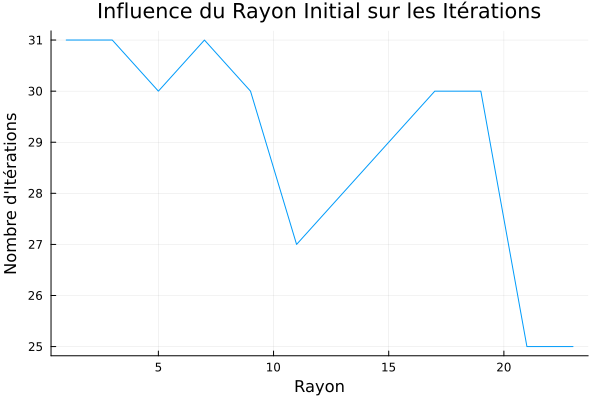

In [5]:
# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

using LinearAlgebra
using Markdown
using Plots

include("../src/Regions_De_Confiance.jl")
include("../src/cauchy.jl")

# Fonction f1, son gradient et sa hessienne
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
grad_f1(x) = [4 * (x[1] + x[2] + x[3] - 3) + 2 * (x[1] - x[2]); 4 * (x[1] + x[2] + x[3] - 3) - 2 * (x[1] - x[2]) + 2 * (x[2] - x[3]); 4 * (x[1] + x[2] + x[3] - 3) - 2 * (x[2] - x[3])]
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1, 1, 1]

# Point initial
x0 = [13, 15, 10]

# Itérations pour différentes valeurs de rayon Δ0
tab = []
for delta0 in 1:2:23  # Modification de l'intervalle si nécessaire
    xmin, f_min, flag, nb_iters, xs = regions_de_confiance(
        f1, 
        grad_f1, 
        hess_f1, 
        x0, 
        max_iter = 1000, 
        tol_abs = sqrt(eps()), 
        tol_rel = 1e-15, 
        epsilon = 1e-2, 
        Δ0 = delta0, 
        Δmax = 10, 
        γ1 = 0.5, 
        γ2 = 2.0, 
        η1 = 0.25, 
        η2 = 0.75, 
        algo_pas = "cauchy", 
        max_iter_gct = 2*length(x0)
    )
    push!(tab, nb_iters)
end

println("variation des itérations pour des valeurs de delta croissante: ", tab)

# Affichage du graphe
plot(1:2:23, tab, title = "Influence du Rayon Initial sur les Itérations", xlabel = "Rayon", ylabel = "Nombre d'Itérations", legend = false)





Tableau d'itération pour des valeurs de gamma2 croissante:
Any[38, 30, 32, 31, 28]


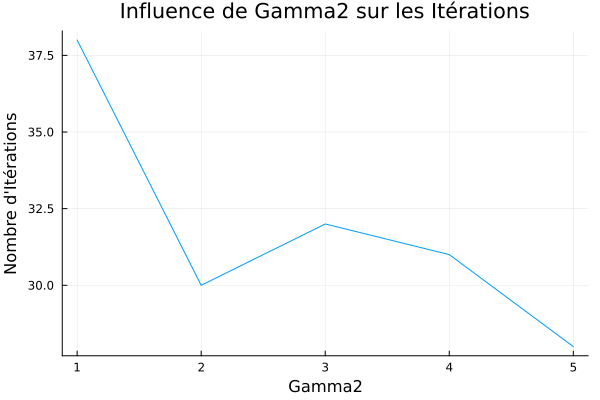

In [6]:
using LinearAlgebra
using Markdown
using Plots


include("../src/Regions_De_Confiance.jl")
include("../src/cauchy.jl")

# Fonction f1, son gradient et sa hessienne
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
grad_f1(x) = [4 * (x[1] + x[2] + x[3] - 3) + 2 * (x[1] - x[2]); 4 * (x[1] + x[2] + x[3] - 3) - 2 * (x[1] - x[2]) + 2 * (x[2] - x[3]); 4 * (x[1] + x[2] + x[3] - 3) - 2 * (x[2] - x[3])]
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1, 1, 1]
x0 = [13, 15, 10]

# Influence de gamma2
tab = []
gamma2_values = range(1, 5, step=1)

for gamma2 in gamma2_values
    xmin, f_min, flag, nb_iters, xs = regions_de_confiance(
        f1, 
        grad_f1, 
        hess_f1, 
        x0, 
        max_iter = 1000, 
        tol_abs = sqrt(eps()), 
        tol_rel = 1e-15, 
        epsilon = 1.e-2, 
        Δ0 = 2, 
        Δmax = 10, 
        γ1 = 0.5, 
        γ2 = gamma2, 
        η1 = 0.25, 
        η2 = 0.75, 
        algo_pas = "cauchy", 
        max_iter_gct = 2*length(x0)
    )
    push!(tab, nb_iters)
end

println("\nTableau d'itération pour des valeurs de gamma2 croissante:")
println(tab)

# Affichage graphique
plot(gamma2_values, tab, title = "Influence de Gamma2 sur les Itérations", xlabel = "Gamma2", ylabel = "Nombre d'Itérations", legend = false)



Tableau d'itération pour des valeurs de eta1 croissante:
Any[30, 30, 30, 30, 30, 30, 30, 30, 30, 1000]


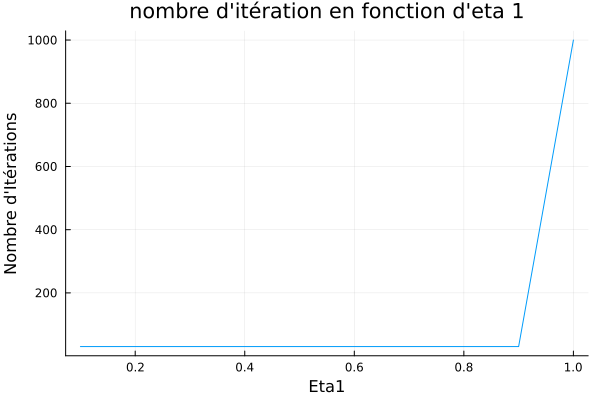

In [7]:
using LinearAlgebra
using Markdown
using Plots

include("../src/Regions_De_Confiance.jl")
include("../src/cauchy.jl")

# Fonction f1, son gradient et sa hessienne
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
grad_f1(x) = [4 * (x[1] + x[2] + x[3] - 3) + 2 * (x[1] - x[2]); 4 * (x[1] + x[2] + x[3] - 3) - 2 * (x[1] - x[2]) + 2 * (x[2] - x[3]); 4 * (x[1] + x[2] + x[3] - 3) - 2 * (x[2] - x[3])]
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1, 1, 1]
x0 = [13, 15, 10]

# Influence de eta1
tab = []
eta1_values = range(0.1, 1.0, step=0.1)

for eta1 in eta1_values
    xmin, f_min, flag, nb_iters, xs = regions_de_confiance(
        f1, 
        grad_f1, 
        hess_f1, 
        x0, 
        max_iter = 1000, 
        tol_abs = sqrt(eps()), 
        tol_rel = 1e-15, 
        epsilon = 1.e-2, 
        Δ0 = 2, 
        Δmax = 10, 
        γ1 = 0.5, 
        γ2 = 2, 
        η1 = eta1, 
        η2 = 0.75, 
        algo_pas = "cauchy", 
        max_iter_gct = 2*length(x0)
    )
    push!(tab, nb_iters)
end

println("\nTableau d'itération pour des valeurs de eta1 croissante:")
println(tab)

# Affichage graphique
plot(eta1_values, tab, title = "nombre d'itération en fonction d'eta 1", xlabel = "Eta1", ylabel = "Nombre d'Itérations", legend = false)


Réponses:

1) Comme f1 est une forme quadratique elle est déjà égale à son developpement de taylor à l'ordreordre 2. Ce type de fonction 
    converge en une seule itération vers la solution exacte avec l'algorithme de newton comme expliqué précdemment. Cependant l'algorithme de région de confiance se révèle moins efficace avec un nombre important d'itération donc un temps plus conséquent pour la convergence, ainsi on remarque qu'il est utile d'analyser les fonctions et leur particularité afin de leur associer l'algorithme le plus efficae, soit l'efficacité d'un algorithme n'est pas absolue mais dépend de la fonctione étudiée.
    
 2) On peut jouer sur plusieurs paramètres, ici nous étudierons l'impact de gamma 2 et eta1, l'exploitation de ces résultats ne sera pas forcément concluante car la quantité de variable (donc d'inconnue) rend une interprétation difficile, ce qu'onn peut dire ici est que l'augmentation de gamma2 semble réduire le nombre d'itération contrairement à eta1, des test plus poussés permettrait de trouver la meilleur combinaison de paramètres.

# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [8]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.0s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [9]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false



Test Summary: | Pass  Total  Time
RC et gct     |   15     15  0.3s


## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

In [10]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

using LinearAlgebra
using Markdown
using Plots

include("../src/Regions_De_Confiance.jl")
include("../src/cauchy.jl")
include("../src/gct.jl")
include("../test/fonctions_de_tests.jl")

# Définition de la fonction f1, de son gradient et de sa hessienne
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
grad_f1(x) = [4 * (x[1] + x[2] + x[3] - 3) + 2 * (x[1] - x[2]); 4 * (x[1] + x[2] + x[3] - 3) - 2 * (x[1] - x[2]) + 2 * (x[2] - x[3]); 4 * (x[1] + x[2] + x[3] - 3) - 2 * (x[2] - x[3])]
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1, 1, 1]



# Paramètres communs pour les expérimentations
max_iter = 1
tol_abs = sqrt(eps())
tol_rel = 1e-15
epsilon = 1e-2
delta0 = 2
deltaMax = 10
gamma1 = 0.5
gamma2 = 2.0
eta1 = 0.25
eta2 = 0.75

# Utilisation du Pas de Cauchy pour 3 points
xmin_cauchy1, f_min_cauchy, flag_cauchy, nb_iters_cauchy, xs_cauchy1 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    x011, 
    max_iter = max_iter, 
    tol_abs = tol_abs, 
    tol_rel = tol_rel, 
    epsilon = epsilon, 
    Δ0 = delta0, 
    Δmax = deltaMax, 
    γ1 = gamma1, 
    γ2 = gamma2, 
    η1 = eta1, 
    η2 = eta2, 
    algo_pas = "cauchy", 
    max_iter_gct = 2*length(x0)
)

xmin_cauchy2, f_min_cauchy, flag_cauchy, nb_iters_cauchy, xs_cauchy2 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    x012, 
    max_iter = max_iter, 
    tol_abs = tol_abs, 
    tol_rel = tol_rel, 
    epsilon = epsilon, 
    Δ0 = delta0, 
    Δmax = deltaMax, 
    γ1 = gamma1, 
    γ2 = gamma2, 
    η1 = eta1, 
    η2 = eta2, 
    algo_pas = "cauchy", 
    max_iter_gct = 2*length(x0)
)



# gct
xmin_gct1, f_min_gct, flag_gct, nb_iters_gct, xs_gct1 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    x011, 
    max_iter = max_iter, 
    tol_abs = tol_abs, 
    tol_rel = tol_rel, 
    epsilon = epsilon, 
    Δ0 = delta0, 
    Δmax = deltaMax, 
    γ1 = gamma1, 
    γ2 = gamma2, 
    η1 = eta1, 
    η2 = eta2, 
    algo_pas = "gct", 
    max_iter_gct = 1 # 1 itération de gct
)

xmin_gct2, f_min_gct, flag_gct, nb_iters_gct, xs_gct2 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    x012, 
    max_iter = max_iter, 
    tol_abs = tol_abs, 
    tol_rel = tol_rel, 
    epsilon = epsilon, 
    Δ0 = delta0, 
    Δmax = deltaMax, 
    γ1 = gamma1, 
    γ2 = gamma2, 
    η1 = eta1, 
    η2 = eta2, 
    algo_pas = "gct", 
    max_iter_gct = 1 # 1 itération de gct
)





# Comparaison des écarts
function calculer_ecarts(xs, sol_exacte)
    return [norm(x - sol_exacte) for x in xs]
end

#point x011
ecarts_cauchy1 = calculer_ecarts(xs_cauchy1, sol_exacte)
ecarts_gct1 = calculer_ecarts(xs_gct1, sol_exacte)

#point x012
ecarts_cauchy2 = calculer_ecarts(xs_cauchy2, sol_exacte)
ecarts_gct2 = calculer_ecarts(xs_gct2, sol_exacte)


println("Écarts pour le point x011:")
println("Pas de Cauchy: ", ecarts_cauchy1)
println("Gradient Conjugué Tronqué: ", ecarts_gct1)

println("\nÉcarts pour le point x012:")
println("Pas de Cauchy: ", ecarts_cauchy2)
println("Gradient Conjugué Tronqué: ", ecarts_gct2)







Écarts pour le point x011:
Pas de Cauchy: [1.4142135623730951]
Gradient Conjugué Tronqué: [1.4142135623730951]

Écarts pour le point x012:
Pas de Cauchy: [9.759098319004682]
Gradient Conjugué Tronqué: [9.759098319004682]


1) Pour une seule itération, on ne remarque aucune différence entre les 2 algorithmes

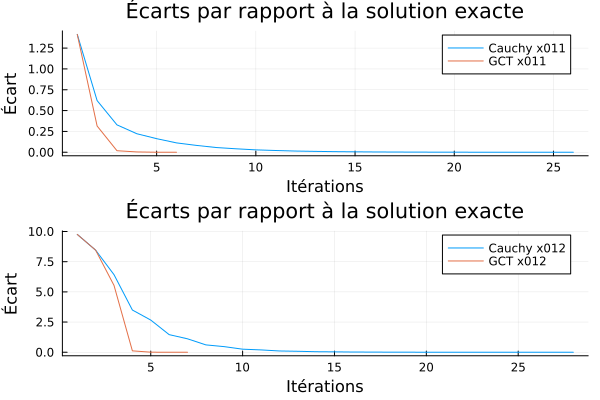

In [11]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

using LinearAlgebra
using Markdown
using Plots

include("../src/Regions_De_Confiance.jl")
include("../src/cauchy.jl")
include("../src/gct.jl")
include("../test/fonctions_de_tests.jl")

# Définition de la fonction f1, de son gradient et de sa hessienne
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
grad_f1(x) = [4 * (x[1] + x[2] + x[3] - 3) + 2 * (x[1] - x[2]); 4 * (x[1] + x[2] + x[3] - 3) - 2 * (x[1] - x[2]) + 2 * (x[2] - x[3]); 4 * (x[1] + x[2] + x[3] - 3) - 2 * (x[2] - x[3])]
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1, 1, 1]



# Paramètres communs pour les expérimentations
max_iter = 100
tol_abs = sqrt(eps())
tol_rel = 1e-15
epsilon = 1e-2
delta0 = 2
deltaMax = 10
gamma1 = 0.5
gamma2 = 2.0
eta1 = 0.25
eta2 = 0.75

# Utilisation du Pas de Cauchy pour 3 points
xmin_cauchy1, f_min_cauchy, flag_cauchy, nb_iters_cauchy, xs_cauchy1 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    x011, 
    max_iter = max_iter, 
    tol_abs = tol_abs, 
    tol_rel = tol_rel, 
    epsilon = epsilon, 
    Δ0 = delta0, 
    Δmax = deltaMax, 
    γ1 = gamma1, 
    γ2 = gamma2, 
    η1 = eta1, 
    η2 = eta2, 
    algo_pas = "cauchy", 
    max_iter_gct = 2*length(x0)
)

xmin_cauchy2, f_min_cauchy, flag_cauchy, nb_iters_cauchy, xs_cauchy2 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    x012, 
    max_iter = max_iter, 
    tol_abs = tol_abs, 
    tol_rel = tol_rel, 
    epsilon = epsilon, 
    Δ0 = delta0, 
    Δmax = deltaMax, 
    γ1 = gamma1, 
    γ2 = gamma2, 
    η1 = eta1, 
    η2 = eta2, 
    algo_pas = "cauchy", 
    max_iter_gct = 2*length(x0)
)



# gct
xmin_gct1, f_min_gct, flag_gct, nb_iters_gct, xs_gct1 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    x011, 
    max_iter = max_iter, 
    tol_abs = tol_abs, 
    tol_rel = tol_rel, 
    epsilon = epsilon, 
    Δ0 = delta0, 
    Δmax = deltaMax, 
    γ1 = gamma1, 
    γ2 = gamma2, 
    η1 = eta1, 
    η2 = eta2, 
    algo_pas = "gct", 
    max_iter_gct = 1 # 1 itération de gct
)

xmin_gct2, f_min_gct, flag_gct, nb_iters_gct, xs_gct2 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    x012, 
    max_iter = max_iter, 
    tol_abs = tol_abs, 
    tol_rel = tol_rel, 
    epsilon = epsilon, 
    Δ0 = delta0, 
    Δmax = deltaMax, 
    γ1 = gamma1, 
    γ2 = gamma2, 
    η1 = eta1, 
    η2 = eta2, 
    algo_pas = "gct", 
    max_iter_gct = 1 # 1 itération de gct
)





# Comparaison des écarts
function calculer_ecarts(xs, sol_exacte)
    return [norm(x - sol_exacte) for x in xs]
end

#point x011
ecarts_cauchy1 = calculer_ecarts(xs_cauchy1, sol_exacte)
ecarts_gct1 = calculer_ecarts(xs_gct1, sol_exacte)

#point x012
ecarts_cauchy2 = calculer_ecarts(xs_cauchy2, sol_exacte)
ecarts_gct2 = calculer_ecarts(xs_gct2, sol_exacte)





using Plots

# Création des graphiques
p1 = plot(ecarts_cauchy1, label="Cauchy x011", title="Écarts par rapport à la solution exacte", xlabel="Itérations", ylabel="Écart")
plot!(p1, ecarts_gct1, label="GCT x011")

p2 = plot(ecarts_cauchy2, label="Cauchy x012", title="Écarts par rapport à la solution exacte", xlabel="Itérations", ylabel="Écart")
plot!(p2, ecarts_gct2, label="GCT x012")


# Affichage des graphiques
plot(p1, p2, layout = (2, 1), legend = true)




3) Il semblerait que l'algorithme regions de confiance selon gct est le plus efficace et ne présente aucun inconvénient comparativement à l'algo avec pas de cauchy